## Исследование данных о российском кинопрокате



Заказчик исследования — Министерство культуры Российской Федерации.\
Нужно изучить рынок российского кинопроката и выявить текущие тренды. Уделить внимание фильмам, которые получили государственную поддержку и ответить на вопрос, насколько такие фильмы интересны зрителю.\
В распоряжении данные, опубликованные на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

Для полноценного анлиза выполним следующие шаги:
1. Импортируем необходимые бибилиотеки и выгрузим данные.
1. Объеденим две таблицы с данными и проверим слияние.
2. Рассмотрим типы данных в каждом столбце и заменим, где необходимо.
3. Изучим пропущенные значения в столбцах и заполним пропуски, где это возможно.
4. Проверим данные на дубликаты.
5. Изучим и скорректируем категориальные значения.
6. Изучим количественные значения и исправим некорректные данные.
7. Добавим новые столбцы для удобства исследования.
8. Проведем исследование в поисках интересных особенностей и зависимостей, которые существуют в прокате кино. 
9. Сделаем выводы по исследованию.


### Шаг 1. Открытие файлов с данными и объединение их в один датафрейм. 

Объединим данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 


In [1]:
import pandas as pd  # импортируем библиотеку Pandas
import matplotlib.pyplot as plt # импортируем библиотеку matplotlib
import seaborn as sns

In [2]:
mkrf_movies = pd.read_csv('/datasets/mkrf_movies.csv', sep=',') # загружаем данные из файла в датафрейм mkrf_movies
mkrf_shows = pd.read_csv('/datasets/mkrf_shows.csv', sep=',') # загружаем данные из файла в датафрейм mkrf_shows

- Проверим количество уникальных значений столбца `puNumber`, по которому будем объединять таблицы.

In [3]:
mkrf_movies['puNumber'].value_counts() # проверяем количество уникальных значений столбца puNumber в mkrf_movies

221054410    2
221154310    2
121000317    1
111001519    1
121030518    1
            ..
124003012    1
112010318    1
221159410    1
111025114    1
111005413    1
Name: puNumber, Length: 7484, dtype: int64

У столбца `puNumbe` при смене типа на int выпала ошибка, что строку "нет" невозможно поменять. \
Заменим "нет" на 0, чтобы поменять тип данных.

In [4]:
mkrf_movies['puNumber'] = mkrf_movies['puNumber'].str.replace('нет', '0').astype('int') # заменяем неккорекное значение на 0 и меняем тип данных

In [5]:
mkrf_shows['puNumber'].value_counts()  # проверяем количество уникальных значений столбца puNumber в mkrf_shows

121020416    1
121013618    1
121025916    1
121030014    1
111003010    1
            ..
124001014    1
124003318    1
111000314    1
124005116    1
121016318    1
Name: puNumber, Length: 3158, dtype: int64

In [6]:
mkrf_shows['puNumber'] = mkrf_shows['puNumber'].astype('int') # меняем тип данных в puNumber на целочисленный тип

In [7]:
# объединяем два датафрейма по столбцу 'puNumber', с добавлением всех данных из левой таблицы
mkrf_general = mkrf_movies.merge(mkrf_shows, on='puNumber', how='left') 
mkrf_general.head() # выводим 5 первых строк объединенной таблицы

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


Проверим как прошло оъединение. Важно, чтобы бы все строки из левой таблицы вошли в новый датафрейм. Проверим по количеству строк. И осталось ли прежнее количество строк второй таблицы.

In [8]:
# проверим равно ли количество строк у исходной первой таблицы с количеством строк объединенной
len(mkrf_movies) == len(mkrf_general)

True

In [9]:
# проверим равно ли количество строк с уникальными значениями puNumber у первой таблицы с количеством строк уникальных значений puNumber новой таблцы
len(mkrf_movies['puNumber'].unique()) == len(mkrf_general['puNumber'].unique())

True

In [10]:
# проверим равно ли количество строк у второй таблицы с количеством не пустых строк по столбцу box_office у объединенной таблицы
len(mkrf_shows) == len(mkrf_general.query('box_office.isna() == False'))

True

- Все в порядке. Можно продолжать анализ.

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверка типов данных

- Проверим типы данных в датафрейме и преобразуем их там, где это необходимо.

In [11]:
mkrf_general.info() # получаем общую информации о данных в таблице mkrf_general

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

**По общей информации проверим типы данных.**\
`show_start_date`(дата премьеры фильма) - поменяем тип данных на тип даты.\
`refundable_support`(объём возвратных средств государственной поддержки) - поменяем тип данных на целочисленное.\
`nonrefundable_support`(объём невозвратных средств государственной поддержки) - поменяем тип данных на целочисленное.\
`ratings`(рейтинг фильма на КиноПоиске) имеет числовое дробное обозначение - поменяем тип данных на тип с плавающей точкой.\
`budget`(общий бюджет фильма)  имеет числовое дробное обозначение - поменяем тип данных на тип с плавающей точкой.\
`box_office`(сборы в рублях) имеет числовое дробное обозначение - поменяем тип данных на тип с плавающей точкой.

In [12]:
mkrf_general['show_start_date'] = pd.to_datetime(mkrf_general['show_start_date'], format = '%Y-%m-%dT%H:%M:%S') 
# меняем тип данных в first_day_exposition на тип даты и времени

In [13]:
# меняем пропуски на 0, так как данные фильмы не финансировались и меняем тип данных на целочисленный тип 
mkrf_general['refundable_support'] = mkrf_general['refundable_support'].astype('Int64')

In [14]:
# меняем пропуски на 0, так как данные фильмы не финансировались и меняем тип данных на целочисленный тип
mkrf_general['nonrefundable_support'] = mkrf_general['nonrefundable_support'].astype('Int64')

In [15]:
mkrf_general['ratings'].unique() # посмотрим уникальные значения в столбце ratings, так как не удалось поменять тип данных на float

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

- Присутствуют значения в процентах. Посмотрим несколько строк с отметкой рейтинга в процентах - у большинства из них на кинопоиске действительно нет рейтинга - он формируется, а у которых есть - он не соответсвтует цифрам в процентах, если делить на 10.\
Поменяем данные отметки на 0, так как такого уникального значения не имеется и чтобы не исказить данные предполагаемыми рейтингами и поменяем тип данных.

In [16]:
mkrf_general.query('ratings == "98%" or ratings == "99%"') # проверяем строки с рейтингом в процентах

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
259,Прошлое,221030715,2015-07-29 12:00:00+00:00,Художественный,"20 Сенчюри Фокс де Архентина, Чемо, ЭйчБи Филм...",Аргентина - Бразилия,Эктор Бабенко,"Эктор Бабенко, Оскар Крамер, Хуго Сидмэн",«16+» - для детей старше 16 лет,<NA>,<NA>,NaN,NaN,99%,"ужасы,триллер,драма",NaN
1341,Сказка о добре и Вре,111008913,2013-11-15 12:00:00+00:00,Художественный,"НП ""Студия игрового кино ""Лик""",Россия,Е.Шиляева,К.Терещенко,«6+» - для детей старше 6 лет,<NA>,<NA>,NaN,NaN,99%,"триллер,драма,детектив",NaN
1805,Спираль.,111001014,2014-01-30 12:00:00+00:00,Художественный,"ООО ""Компания Питон""",Россия,А.Волгин,Е.Ковалева,«12+» - для детей старше 12 лет,<NA>,<NA>,NaN,NaN,99%,"аниме,мультфильм,ужасы",4295.0
6616,ОТ ВОЙНЫ ДО НАШИХ ДНЕЙ,111026518,2019-01-21 12:00:00+00:00,Художественный,ИП Вайсман Анатолий Александрович,Россия,"А.Сазонов, Е.Климович, А.Коломеец, С.Черникова...","Д.Руюежин, Л.Пятницкая, Д.Колеров, Э.Ким, А.Хомич",«12+» - для детей старше 12 лет,<NA>,<NA>,NaN,NaN,98%,"фантастика,боевик",NaN
6737,Колесо времени,111003219,2019-03-01 12:00:00+00:00,Художественный,"ООО ""БестМедиа""",Россия,Б.Куломзин,Б.Куломзин,«6+» - для детей старше 6 лет,<NA>,<NA>,NaN,NaN,98%,"фэнтези,приключения",34992.0
6882,Животные рядом со Святыми,112003719,2019-05-03 12:00:00+00:00,Документальный,"ООО ""Кинопрограмма ""XXI век""",Россия,Т.Мирошник,"В.Есинов, Е.Калинина",«0+» - для любой зрительской аудитории,<NA>,<NA>,NaN,NaN,99%,"криминал,драма",NaN


In [17]:
mkrf_general['ratings'] = mkrf_general['ratings'].str.replace('%', '') # убираем знак процентов

In [18]:
mkrf_general['ratings'] = pd.to_numeric(mkrf_general['ratings'], errors='raise') # меняем тип данных в ratings на тип с плавающей точкой

In [19]:
mkrf_general.loc[mkrf_general['ratings'] > 10, 'ratings'] = 0 # исправляем некорректные значения на 0

In [20]:
# меняем тип данных на тип с плавающей точкой и округляем
mkrf_general['budget'] = pd.to_numeric(mkrf_general['budget'], errors='raise')
mkrf_general['budget'] = round(mkrf_general['budget']) # округляем до одного знака после запятой

In [21]:
mkrf_general['box_office'] = pd.to_numeric(mkrf_general['box_office'], errors='raise')
mkrf_general['box_office'] = round(mkrf_general['box_office'])
# меняем тип данных в box_office на тип с плавающей точкой и округляем

In [22]:
mkrf_general['genres'] = mkrf_general['genres'].astype(str) # поменяем у genres тип данных на строковый

#### Шаг 2.2. Изучим пропуски в датафрейме


In [23]:
pd.DataFrame([round(mkrf_general.isna().sum()), round(mkrf_general.isna().mean()*100,)]).style.background_gradient('coolwarm')
# посмотрим количество пропусков и их процентное отношение

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,0.000000,0.000000,0.000000,0.000000,18.000000,2.000000,9.000000,568.000000,0.000000,7154.000000,7154.000000,7154.000000,7154.000000,967.000000,0.000000,4328.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,96.000000,96.000000,96.000000,96.000000,13.000000,0.000000,58.000000


**Пропуски**\
По общей информации о пропусках наблюдаются небольшое их количество по столбцам:\
`film_studio`(студия-производитель), `production_country`(страна-производитель) и `director`(режиссёр).
Рассмотрим их подробнее, возможно можно дополнить данные вручную.\
Много пропусков равных по количеству по столбцам: `refundable_support`(объём возвратных средств государственной поддержки),\
`nonrefundable_support`(объём невозвратных средств государственной поддержки), `budget`(общий бюджет фильма),\
`financing_source`(источник государственного финансирования) - вероятно относятся к одним и тем же фильмам, которые не финансировались. Оставим пропуски как есть.\
И так же есть пропуски по столбцам `producer`(продюсер), `ratings`(рейтинг фильма на КиноПоиске), `genres`(жанр фильма), \
`box_office`(сборы в рублях) - рассмотрим подробнее. Причиной может быть - отсутсвие данной информации или ошибки в данных.

In [24]:
mkrf_general.query('film_studio.isna() == True') # посмотрим строки с пропусками в film_studio

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1293,Stars in Shorts,121011114,2014-06-03 12:00:00+00:00,Художественный,NaN,"США, Великобритания","Роберт Фестингер, Руперт Френд, Джей Камен, Ни...","Татьяна Келли, Роберта Мунро, Руперт Френд, До...",«16+» - для детей старше 16 лет,<NA>,<NA>,NaN,NaN,7.3,комедия,NaN
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,<NA>,<NA>,NaN,NaN,4.0,"мультфильм,комедия",NaN
6105,Значит любит,111013818,2018-08-10 12:00:00+00:00,Художественный,NaN,Россия,А.Краевский,Е.Щербакова,«18+» - запрещено для детей,<NA>,<NA>,NaN,NaN,NaN,nan,NaN
6181,Несейка. Младшая дочь,112007018,2018-09-01 12:00:00+00:00,Документальный,NaN,Россия,В.Марин,"Д.Якунин, Ф.Абрютин, О.Филонова",«6+» - для детей старше 6 лет,<NA>,<NA>,NaN,NaN,NaN,nan,NaN
6379,Ян Антонышев,112011818,2018-11-15 12:00:00+00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,<NA>,<NA>,NaN,NaN,NaN,nan,NaN
6380,Ян Антонышев,112011918,2018-11-15 12:00:00+00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,<NA>,<NA>,NaN,NaN,NaN,nan,NaN
6399,Доживем до каникул?..,111021918,2018-11-15 12:00:00+00:00,Художественный,NaN,Россия,Я.Хальпукова (псевдоним Яна Мартынец),Я.Хальпукова (псевдоним Яна Мартынец),«12+» - для детей старше 12 лет,<NA>,<NA>,NaN,NaN,NaN,nan,41225.0
6485,До и После,112014418,2018-12-05 12:00:00+00:00,Документальный,NaN,Россия,А.Новокреповская,А.Новокреповская,«6+» - для детей старше 6 лет,<NA>,<NA>,NaN,NaN,6.9,"драма,криминал,детектив",NaN
6494,Калмыцкий геше Нгаванг Вангьял,113002018,2018-12-05 12:00:00+00:00,Научно-популярный,NaN,Россия,И.Долгина,И.Долгина,«12+» - для детей старше 12 лет,<NA>,<NA>,NaN,NaN,NaN,nan,NaN
6497,Мой папа Чингисхан,112014918,2018-12-06 12:00:00+00:00,Документальный,NaN,Россия,А.Сайфуллина,А.Сайфуллина,«12+» - для детей старше 12 лет,<NA>,<NA>,NaN,NaN,NaN,nan,NaN


- Связи пропусков `film_studio` с другими значениями не наблюдается. Пока оставим как есть, так как другие данные есть по данным строчкам и могут пригодиться для исследования.

In [25]:
mkrf_general.query('production_country.isna() == True') # проверям строки с пропусками в production_country

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3186,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,<NA>,<NA>,NaN,NaN,7.2,"детский,комедия",194527.0
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,<NA>,<NA>,NaN,NaN,4.0,"мультфильм,комедия",NaN


- По студии ООО "Продюсерский центр ЕРАЛАШ" заменим пропуск в `production_country` на соответствующее значение.

In [26]:
mkrf_general.loc[mkrf_general['film_studio']=='ООО "Продюсерский центр ЕРАЛАШ"'].head(2) # проверяемм страну-производителя у студии "Ералаш"

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1010,"Детский юмористический киножурнал ""Ералаш"", вы...",111001613,2013-05-16 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",Россия,"Г.Курлаев, С.Морозов, В.Панжев, Н.Репина, К.Се...","ООО ""Продюсерский центр ЕРАЛАШ""",«6+» - для детей старше 6 лет,<NA>,<NA>,NaN,NaN,7.2,"детский,комедия",3545.0
1282,"Детский юмористический киножурнал ""Ералаш"", вы...",111008613,2013-10-18 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",Россия,"И.Белостоцкий, В.Панжев, А.Щеглов, Н.Хлопецкая...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,<NA>,<NA>,NaN,NaN,7.2,"детский,комедия",3580.0


In [27]:
# заменяем пропуск в production_country по студии "Ералаш" на Россию
row = (mkrf_general['film_studio']=='ООО "Продюсерский центр ЕРАЛАШ"')&(mkrf_general['production_country'].isna() == True)
mkrf_general.loc[row, 'production_country'] ='Россия' 

In [28]:
for i in mkrf_general['title']: # проверяем в title есть ли другие выпуски "Мульт личности", чтобы посмотреть страну производителя
    if 'Мульт личности' in i:
            print(i)        

Мульт личности. Выпуск 5


- Других выпусков нет. Страну производства посмотрим в интернете - это Россия. Нашлась и другая информация:\
`film_studio` - Анимационная студия «Пространство идей», \
`director` - В.Пичул, Ю.Владовский,\
`producer` - К.Эрнст, А.Либерман, Д.Либерман, Д.Азадов, Д.Либерман. \
Заменим пропуски.

In [29]:
# заполняем пропуск у "Мульт личности" по стране-производителю
mkrf_general.loc[(mkrf_general['puNumber'] == 214000410) & (mkrf_general['production_country'].isna()), 'production_country'] = 'Россия'

In [30]:
# заполняем пропуск у "Мульт личности" по студии-производителю
mkrf_general.loc[(mkrf_general['puNumber'] == 214000410) & (mkrf_general['film_studio'].isna()), 'film_studio'] = 'Анимационная студия "Пространство идей"'

In [31]:
# заполняем пропуск у "Мульт личности" по режиссеру
mkrf_general.loc[(mkrf_general['puNumber'] == 214000410) & (mkrf_general['director'].isna()), 'director'] = 'В.Пичул, Ю.Владовский'

In [32]:
# заполняем пропуск у "Мульт личности" по продюсеру
mkrf_general.loc[(mkrf_general['puNumber'] == 214000410) & (mkrf_general['producer'].isna()), 'producer'] = 'К.Эрнст, А.Либерман, Д.Либерман, Д.Азадов, Д.Либерман'

In [33]:
mkrf_general.query('director.isna() == True') # посмотрим строки с пропусками в director

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
764,"Три звезды. Концерт в Waldbuhne Theater, Берли...",126003512,2012-12-04 12:00:00+00:00,Прочие,Райзинг Алтернатив,Великобритания,NaN,Вальдбюне Театр,«0+» - для любой зрительской аудитории,<NA>,<NA>,NaN,NaN,NaN,nan,44350.0
1735,Помпеи. Британский музей,126003413,2013-09-11 12:00:00+00:00,Прочие,"МортуСкрин, Британский музей",Великобритания,NaN,Британский музей,«0+» - для любой зрительской аудитории,<NA>,<NA>,NaN,NaN,NaN,nan,NaN
3840,Зур концерт (Большой концерт).,217027010,2010-06-24 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,<NA>,<NA>,NaN,NaN,NaN,nan,NaN
4052,"Ганс Сэйфуллин ""Авылым чишмэлэре. Ганс Сэйфулл...",217017310,2010-04-22 12:00:00+00:00,Художественный,"ООО ""Барс-Рекордс""",Россия,NaN,NaN,«0+» - для любой зрительской аудитории,<NA>,<NA>,NaN,NaN,NaN,nan,NaN
4298,Изге Вэли (Святой Валентин),217020610,2010-05-20 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,<NA>,<NA>,NaN,NaN,NaN,nan,NaN
4415,Bon Jovi. The Circle Tour,126001710,2010-11-11 12:00:00+00:00,Прочие,Эншутц Интертейнмент Груп,США,NaN,Эншутц Интертейнмент Груп,«0+» - для любой зрительской аудитории,<NA>,<NA>,NaN,NaN,7.9,"концерт,музыка",NaN
4923,Георг Фридрих Гендель. Мессия. Оратория. Корол...,126001111,2011-04-25 12:00:00+00:00,Прочие,Опус Арт,Великобритания,NaN,Короевский колледж Кембриджа,«0+» - для любой зрительской аудитории,<NA>,<NA>,NaN,NaN,NaN,nan,NaN
4942,Питер Гэбриэл и New Blood Orchestra 3D,126002711,2011-11-11 12:00:00+00:00,Прочие,Омниверс Визион,Великобритания,NaN,Омниверс Визион,«0+» - для любой зрительской аудитории,<NA>,<NA>,NaN,NaN,6.7,"концерт,музыка",NaN


- Пропуски по `director` в основном у концертов. Оставим пропуски в рижиссерах как есть, так как связи пропусков с другими значениями нет.

In [34]:
mkrf_general.query('producer.isna() == True').head(5) #посмотрим строки с пропусками в producer

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,<NA>,<NA>,NaN,NaN,6.6,"драма,военный",NaN
5,Остановился поезд,111013816,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,<NA>,<NA>,NaN,NaN,7.7,драма,NaN
6,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,<NA>,<NA>,NaN,NaN,8.3,"мелодрама,комедия",2700.0
9,Отпуск за свой счет,111019114,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,<NA>,<NA>,NaN,NaN,7.8,"мелодрама,комедия",NaN
11,Ответный ход,111019014,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,М.Туманишвили,NaN,«12+» - для детей старше 12 лет,<NA>,<NA>,NaN,NaN,7.8,"боевик,драма,приключения",NaN


- Похоже пропуски в продюсере связаны со страной-производителем. В СССР продюссирование еще не было. И возможно и в некоторых других странах.
Проверим количество пропусков в `producer` только со страной СССР.

In [35]:
len(mkrf_general.query('producer.isna() == True and production_country == "СССР"')) # смотрим количество пропусков по продюсерам со страной СССР

342

342 из 568 пропусков по producer со страной только СССР. Посмотрим остальные пропуски по продюсерам.

In [36]:
mkrf_general.query('producer.isna() == True and production_country != "СССР"') # проверяем остальные пропуске по продюсерам

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
9,Отпуск за свой счет,111019114,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,<NA>,<NA>,NaN,NaN,7.8,"мелодрама,комедия",NaN
25,Призрак замка Моррисвиль,221072614,2014-12-29 12:00:00+00:00,Художественный,Фильмове Студио Баррандов,Чехословакия,Боривой Земан,NaN,«12+» - для детей старше 12 лет,<NA>,<NA>,NaN,NaN,7.7,комедия,NaN
48,Азартные игры,221058014,2014-10-15 12:00:00+00:00,Художественный,"Мирамакс, Дименшн Филмс",США,Джон Франкенхаймер,NaN,«16+» - для детей старше 16 лет,<NA>,<NA>,NaN,NaN,7.0,"боевик,триллер,драма",NaN
61,Американская дочь,111005515,2015-04-23 12:00:00+00:00,Художественный,"АО ""Караван"", Компания ""Америкен Дистрибьюшн"",...","Россия, Казахстан, США",К.Шахназаров,NaN,«6+» - для детей старше 6 лет,<NA>,<NA>,NaN,NaN,7.0,"драма,комедия",300.0
65,Бархатный сезон,111011113,2013-12-19 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм"", ""Про Дис Фильм"" АГ Цюри...","СССР, Швеция",В.Павлович,NaN,«6+» - для детей старше 6 лет,<NA>,<NA>,NaN,NaN,5.9,мелодрама,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7198,Манхэттенский фестиваль короткометражного кино...,121025219,2019-09-26 12:00:00+00:00,Художественный,Манхэттен Шорт Инкорпорейтед,США,"П.Анделл, М,Барбе, А,Войячек, Ф.Дэвис, Ф,Кит-Р...",NaN,«18+» - запрещено для детей,<NA>,<NA>,NaN,NaN,NaN,nan,6341493.0
7204,Связанные миры,124006919,2019-09-19 12:00:00+00:00,Анимационный,Крафтар Студио,Япония,Юхэй Сакураги,NaN,«12+» - для детей старше 12 лет,<NA>,<NA>,NaN,NaN,8.1,"мелодрама,фэнтези,триллер",2488436.0
7231,Побег из джунглей,124007819,2019-09-19 12:00:00+00:00,Анимационный,Фантавилд Пикчерз,КНР,"Линь Хуэйда, Дин Лян",NaN,«6+» - для детей старше 6 лет,<NA>,<NA>,NaN,NaN,6.0,"мультфильм,комедия,фантастика",25475358.0
7243,Дух Баухауса,126004619,2019-10-09 12:00:00+00:00,Прочие,"Икарус Филмз, Филмтанк, Цвейтес Дойчес Фернштейн",Германия,"Нильс Болбринкер, Томас Тильш",NaN,«16+» - для детей старше 16 лет,<NA>,<NA>,NaN,NaN,7.4,документальный,1228130.0


- По остальным пропускам в продюсерах логичной связи не наблюдается. Оставим пропуски как есть.

In [37]:
# проверим пропуски budget, refundable_support, nonrefundable_support - в одних ли они строчках
len(mkrf_general.query('budget.isna() == True and refundable_support.isna() == True and  nonrefundable_support.isna() == True'))

7154

- по столбцам `refundable_support`, `nonrefundable_support`, `budget`, `financing_source` количество пропусков одинаковое по одним и тем же строкам. Пропуски заполнять не будем, так как одинаковое количесво пропусков по даннным столбцам указывает на то, что фильмы не финансировались государством и бюджет предоставлен только по тем, что финансировались.

- заменим пропуски в `ratings` на 0, так как заполнить их нечем и в оригинальных данных нулей не было.

In [38]:
mkrf_general['ratings'] = mkrf_general['ratings'].fillna(0) # заполняем пропуски по ratings нулями

- пропуски в `box_office` (сборы в рублях) скорее всего или из-за отсутствия даных, так же заполнить нечем. Поменяем на -1, чтобы выделялись на фоне значений 0:

In [39]:
mkrf_general['box_office'] = mkrf_general['box_office'].fillna(-1) # заполняем пропуски по box_office нулями

In [40]:
mkrf_general.query('genres.isna() == True') # проверяем строки с пропусками по genres
len(mkrf_general.query('genres.isna() == True and ratings.isna() == True'))

0

- Почти у всех пропусков по `genres`(жанр) отсутсвует и рейтинг. Оставим пропуски как есть, возможно ошибка выгрузки данных.\
Логической связи с другими столбцами нет, чтобы можно было заполнить пропуски.

#### Шаг 2.3. Проверим есть ли в данных дубликаты

In [41]:
mkrf_general.duplicated().sum() # проверим наличие явных дубликатов

0

- Явных дубликатов не выявлено.

In [42]:
len(mkrf_general['title'].unique()) # посмотрим количество уникальных значений столбца с названиями фильмов

6772

- количество уникальных строк `title` не соответствует общему количеству строк, значит есть не явные дубликаты.

In [43]:
mkrf_general['title'].value_counts() # посмотрим колчество уникальных значений

День святого Валентина_                                                                                                                                                                                                5
Начало_                                                                                                                                                                                                                4
Там, где живут чудовища                                                                                                                                                                                                4
Дом грёз                                                                                                                                                                                                               4
Рапунцель: Запутанная история                                                                                                       

In [44]:
mkrf_general.query('title.duplicated() == True').head() # посмотрим первые 5 строк с дубликатами в title

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,<NA>,<NA>,NaN,NaN,6.8,"фантастика,боевик,триллер",-1.0
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,<NA>,<NA>,NaN,NaN,6.8,"фантастика,боевик,триллер",-1.0
41,Алекс и Эмма,221004616,2016-02-09 12:00:00+00:00,Художественный,"Эскейп Артистс, Франчайз Пикчерз, Рейнер-Грэйс...",США,Роб Райнер,"Тодд Блэк, Элан Грейсман, Джереми Левен, Роб Р...",«16+» - для детей старше 16 лет,<NA>,<NA>,NaN,NaN,6.4,"мелодрама,комедия",-1.0
110,Гарри Поттер и орден Феникса /По роману Дж.К.Р...,121026316,2016-09-23 12:00:00+00:00,Художественный,"Уорнер Бразерс, Хэйдей Филмз",США - Великобритания,Дэвид Йетс,"Дэйвид Баррон, Дэйвид Хейман",«16+» - для детей старше 16 лет,<NA>,<NA>,NaN,NaN,7.7,"фэнтези,приключения,семейный",759526.0
113,Гарри Поттер и узник Азкабана /По роману Дж.К....,121026116,2016-09-23 12:00:00+00:00,Художественный,"Хэйдей Филмз, 1492 Пикчерз, Уорнер Бразерс",США,Альфонсо Куарон,Майкл Барната,«12+» - для детей старше 12 лет,<NA>,<NA>,NaN,NaN,8.2,"фэнтези,приключения,семейный",1125302.0


- Видно по одинаковым режиссерам и рейтингам, что это одни и те же фильмы. Но отличается `puNumber`(номер прокатного удостоверения) и `show_start_date` (дата премьеры фильма) и `box_office` предположительно указан только у одной строки каждого дубля. Предположительно у данных фильмов было несколько раз отозвано прокатное удостоверение и получено заново. Возможно даты соответствуют выдачи прокатного удостоверения, а не дате премьеры, так как например у фильмов СССР указаны даты 2000-ых годов, и "Кошмар на улице Вязов /Фильм ужасов" вышел в 1984году, а дата премьеры так же указана в 2000-ых.

**Проверим фильмы одинаковые по названию, но разные по режиссерам.**

In [45]:
# приведем имена режиссеров к нижнему регистру, чтобы проверить на дубликаты с фильмами
mkrf_general['director'] = mkrf_general['director'].str.lower()

In [46]:
mkrf_general.duplicated(subset=['title', 'director'], keep=False).sum()

1220

In [47]:
# посмотрим наличие строк, где дублируются фильмы, но не режиссеры
len(mkrf_general.query('title.duplicated() == True and director.duplicated() == False'))

26

- Есть дубликаты в названиях фильмов, но с разными режиссерами - вероятно это разные картины.

Отсортируем данные по дате, так как у дубликатов разные даты - оставим те, что поновее и удалим строки с дубликатами в названиях и в режиссерах и оставим те строки, где указан сбор.

In [48]:
mkrf_general_sort = mkrf_general.sort_values(by='show_start_date', ascending = False)
mkrf_general_sort = mkrf_general.sort_values(by='box_office', ascending = False)
mkrf_general_sort = mkrf_general_sort.drop_duplicates(subset=['title', 'director'])
mkrf_general_sort = mkrf_general_sort.dropna(subset=['title', 'director']).reset_index(drop=False)
mkrf_general_sort.query('title.duplicated() == True').head(10)

,index,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2100,6838,Супергерои,126000719,2019-05-02 12:00:00+00:00,Прочие,Симеттрика Интертейнмент,Великобритания,том о'дэлл,Том О'Дэлл,«12+» - для детей старше 12 лет,<NA>,<NA>,NaN,NaN,5.1,комедия,463862.0
2278,7438,Зверь,121035919,2019-12-05 12:00:00+00:00,Художественный,Студио энд Нью,Южная Корея,ли джон-хо,"Чан Гён-ик, Чон Джи-хун, Пэк Кён сук",«18+» - запрещено для детей,<NA>,<NA>,NaN,NaN,6.5,"триллер,драма",175004.0
2571,1415,Она,121003414,2014-02-20 12:00:00+00:00,Художественный,Аннапурна Пикчерз,США,спайк джонс,"Меган Эллисон, Спайк Джонс, Винсент Ландэйл",«16+» - для детей старше 16 лет,<NA>,<NA>,NaN,NaN,7.6,"мелодрама,фантастика,драма",13420.0
3273,7474,Вторжение,111022519,2019-12-23 12:00:00+00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,ф.бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000,400000000,944000000.0,Фонд кино,5.7,"фантастика,боевик",-1.0
3393,5093,Профессионал,121012311,2011-07-11 12:00:00+00:00,Художественный,"Омнилаб Медиа, Эмбиэнс Интертейнмент, Каррент ...",США-Австралия,гэри маккендри,"Майкл Буген, Тони Уиндли, Стив Чесмэн",«16+» - для детей старше 16 лет,<NA>,<NA>,NaN,NaN,6.8,"боевик,триллер",-1.0
3662,4805,Дитя тьмы,221009711,2011-01-20 12:00:00+00:00,Художественный,"Уорнер Бразерс, Дарк Касл Интертейнмент, Аппиа...",США - Канада - Германия - Франция,хаум коллет-серра,"Леонардо ДиКаприо, Сьюзен Доуни",«16+» - для детей старше 16 лет,<NA>,<NA>,NaN,NaN,6.9,"ужасы,триллер,детектив",-1.0
3712,5937,Успех,111008418,2018-06-14 12:00:00+00:00,Художественный,Сунцов Валентин Валерьевич,Россия,в.сунцов,В.Сунцов,«12+» - для детей старше 12 лет,<NA>,<NA>,NaN,NaN,7.8,драма,-1.0
3746,5997,Игра с огнем,111010318,2018-07-09 12:00:00+00:00,Художественный,"АО ""АМАЛЬГАМА СТУДИЯ""",Россия,в.донсков,"С.Новиков, А.Феофанов",«16+» - для детей старше 16 лет,<NA>,<NA>,NaN,NaN,5.6,триллер,-1.0
3927,6193,Турист,111016418,2018-09-05 12:00:00+00:00,Художественный,ИП Казиев Михаил Эльшадович,Россия,д.кудрявцев,Д.Кудрявцев,«16+» - для детей старше 16 лет,<NA>,<NA>,NaN,NaN,7.1,боевик,-1.0
4142,7262,Морская бригада,124007419,2019-09-30 12:00:00+00:00,Анимационный,"Сильвер Ант, Джазира Чилдренс Ченел",Малайзия,го аун хое,Джин Лим,«6+» - для детей старше 6 лет,<NA>,<NA>,NaN,NaN,4.3,мультфильм,-1.0


#### Шаг 2.4. Изучим категориальные значения

- Посмотрим, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправим проблемные значения в поле `type`.


- Почти во всех категориальных столбцах присутствуют разные символы - нижнее подчеркивание или точки на конце или восклицательные знаки, так же используется разный регистр. Есть проблема в написании иностранных слов кириллицей - некоторые одинаковые слова напечатаны по разному.

**По очереди проверим и поправить, где необходимо, все столбцы с категориальными значениями.**

In [49]:
mkrf_general_sort['title'].unique() # смотрим уникальные значения в title
mkrf_general_sort['title_new'] = mkrf_general_sort['title'].str.strip() # убираем пробелы в начале и в конце в genres
mkrf_general_sort['title_new'] = mkrf_general_sort['title_new'].str.rstrip('_.!') # преобразуем без лишних знаков в конце

In [50]:
mkrf_general_sort['type'].value_counts()# смотрим уникальные значения в type

Художественный                3925
 Художественный               1374
Анимационный                   770
Прочие                         388
Документальный                 283
Научно-популярный               52
Музыкально-развлекательный       1
 Анимационный                    1
Name: type, dtype: int64

In [51]:
mkrf_general_sort['type_new'] = mkrf_general_sort['type'].str.strip()  # убираем пробелы в начале и в конце в type
mkrf_general_sort['type_new'] = mkrf_general_sort['type_new'].str.rstrip('.') # убираем точки в конце в type

In [52]:
mkrf_general_sort['film_studio'].value_counts() # смотрим уникальные значения в film_studio

Киностудия "Мосфильм"                                                                                                     339
ООО "Мульт в кино"                                                                                                         57
Анимаккорд Лтд                                                                                                             23
ООО "Мульт в кино"                                                                                                         18
ФГУП "ТПО "Киностудия "Союзмультфильм"                                                                                     16
                                                                                                                         ... 
Герман Васке Эмотионал Нетворк                                                                                              1
ИП Казиев Михаил Эльшадович                                                                                           

In [53]:
mkrf_general_sort['film_studio_new'] = mkrf_general_sort['film_studio'].str.strip()  # убираем пробелы в начале и в конце в film_studio
mkrf_general_sort['film_studio_new'] = mkrf_general_sort['film_studio_new'].str.rstrip('_.!') # убираем точки в конце в film_studio

In [54]:
mkrf_general_sort['production_country'].unique() # смотрим уникальные значения в production_country

array(['Россия', 'США', 'США - Канада', 'США - Великобритания',
       'США, Франция, Япония', 'США - Канада - Япония - КНР',
       'США - Австралия', 'США - Великобритания - КНР', 'США - Испания',
       'Великобритания - США', 'США - Великобритания - Канада - КНР',
       'США - КНР', 'США - Великобритания - Испания',
       'США - Бельгия - Великобритания',
       'США - Великобритания - Франция - Гонконг',
       'США - Великобритания - Япония', 'США - Мальта', 'США-КНР',
       'Франция', 'Великобритания, Канада, США',
       'США - Канада - Аргентина', 'США - Великобритания - Австралия',
       'США - Финляндия', 'США-Австралия', 'США - Вьетнам', 'КНР - США',
       'США - Гонконг - КНР ', 'Великобритания', 'США- Ю.Корея',
       'США-Великобритания-Австралия', 'США ', 'США, Япония',
       'США - Новая Зеландия', 'Россия-Украина', 'США - Мексика',
       'США - Австралия - Новая Зеландия - Великобритания',
       'США - Германия - КНР', 'Великобритания - Франция',
       'США -

In [55]:
mkrf_general_sort.query('production_country == "2019"') # посмотрим название фильма со страной "2019"

,index,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,title_new,type_new,film_studio_new
4148,7247,Дело Коллини,121027219,2019-09-19 12:00:00+00:00,Художественный,"Константин Филм, Глобал Скрин, Севен Пикчерз Сван",2019,марко кройцпайнтнер,"Мартин Московиц, Кристоф Мюллер, Марсель Хартг...",«16+» - для детей старше 16 лет,<NA>,<NA>,NaN,NaN,7.4,"детектив,драма,криминал",-1.0,Дело Коллини,Художественный,"Константин Филм, Глобал Скрин, Севен Пикчерз Сван"


- Посмотрим информацию о стране-производителе фильма "Дело Коллини" в Кинопоиске - это Германия.

In [56]:
mkrf_general_sort['production_country_new'] = mkrf_general_sort['production_country'].str.strip() # убираем пробелы в начале и в конце в production_country
mkrf_general_sort['production_country_new'] = mkrf_general_sort['production_country_new'].str.rstrip('_.!') 
mkrf_general_sort['production_country_new'] = mkrf_general_sort['production_country_new'].str.replace(' - ', ',') # преобразуем в единый вид
mkrf_general_sort['production_country_new'] = mkrf_general_sort['production_country_new'].str.replace('-', ',')
mkrf_general_sort['production_country_new'] = mkrf_general_sort['production_country_new'].str.replace(', ', ',')
mkrf_general_sort['production_country_new'] = mkrf_general_sort['production_country_new'].str.replace(';', '')
mkrf_general_sort['production_country_new'] = mkrf_general_sort['production_country_new'].str.replace('2019', 'Германия')

In [57]:
mkrf_general_sort['director'].value_counts() # смотрим уникальные значения в director

о.семёнова                  47
д.червяцов                  16
вуди аллен                  13
стивен содерберг            12
о.семёнова                  12
                            ..
рафик сарджанян              1
а.бальчев                    1
дэвид листер                 1
микеланджело фраммартино     1
кристиан биодани             1
Name: director, Length: 4807, dtype: int64

In [58]:
mkrf_general_sort['director_new'] = mkrf_general_sort['director'].str.strip()  # убираем пробелы в начале и в конце в director
mkrf_general_sort['director_new'] = mkrf_general_sort['director_new'].str.rstrip('_.!')

In [59]:
mkrf_general_sort['producer'].value_counts()  # смотрим уникальные значения в producer

П.Смирнов                                         67
Олег Кузовков, Дмитрий Ловейко, Марина Ратина     28
С.Сельянов                                        18
Д.Ловейко, О.Кузовков                             16
Кевин Фейги                                       11
                                                  ..
Эрмиан Бернштейн, Джонатан Шестак                  1
Фредерик Брийон, Клеман Мизерез, Мэттью Уортер     1
Альберт Бергер, Роберт граф, Рон Йеркса            1
Росс М.Динерштейн, Трейс Шиэн                      1
 Мишель Чиджик, Джефф Абберли, Натали Марисано     1
Name: producer, Length: 5330, dtype: int64

In [60]:
mkrf_general_sort['producer_new'] = mkrf_general_sort['producer'].str.strip()  # убираем пробелы в начале и в конце в producer
mkrf_general_sort['producer_new'] = mkrf_general_sort['producer_new'].str.rstrip('_.!')

In [61]:
mkrf_general_sort['age_restriction'].value_counts()  # смотрим уникальные значения в age_restriction

«16+» - для детей старше 16 лет           2521
«12+» - для детей старше 12 лет           1488
«18+» - запрещено для детей               1437
«0+» - для любой зрительской аудитории     743
«6+» - для детей старше 6 лет              605
Name: age_restriction, dtype: int64

In [62]:
mkrf_general_sort['financing_source'].value_counts() # смотрим уникальные значения в financing_source

Министерство культуры               164
Фонд кино                           146
Министерство культуры, Фонд кино     22
Name: financing_source, dtype: int64

In [63]:
mkrf_general_sort['genres'].unique() # смотрим уникальные значения в genres

array(['комедия', 'спорт,драма', 'фантастика,боевик,драма',
       'драма,военный,боевик', 'фэнтези,боевик,комедия',
       'мультфильм,комедия,криминал',
       'мультфильм,короткометражка,комедия', 'боевик,фантастика,триллер',
       'фэнтези,приключения,семейный', 'триллер,драма,криминал',
       'фантастика,боевик,приключения', 'мультфильм,мюзикл,фэнтези',
       'мультфильм,фэнтези,боевик', 'комедия,приключения',
       'комедия,фэнтези,приключения', 'мультфильм,фантастика,комедия',
       'фантастика,боевик,комедия', 'фантастика,боевик,фэнтези',
       'боевик,триллер,приключения', 'мультфильм,комедия,приключения',
       'nan', 'боевик,триллер,криминал', 'драма,триллер,приключения',
       'мультфильм,фантастика,фэнтези', 'фэнтези,боевик,приключения',
       'фантастика,фэнтези,боевик', 'история,драма,боевик',
       'фэнтези,драма,приключения', 'фантастика,приключения,боевик',
       'аниме,мультфильм,приключения', 'драма,комедия',
       'ужасы,фэнтези,драма', 'фантастика,боев

In [64]:
mkrf_general_sort['genres_new'] = mkrf_general_sort['genres'].str.strip() # убираем пробелы в начале и в конце в genres
mkrf_general_sort['genres_new'] = mkrf_general_sort['genres_new'].str.rstrip('_.!') 
mkrf_general_sort['genres_new'] = mkrf_general_sort['genres_new'].str.replace('-', '') # преобразуем в единый вид

#### Шаг 2.5. Проверим количественные значения

- Проверим, обнаружились ли в таких столбцах подозрительные данные.


**По очереди проверим и поправим, где необходимо, все столбцы с количественными значениями.**

- В шаге объединения таблиц в `puNumber` было обнаружено значение "нет" и изменено на 0.\
Еще раз проверим строку в `puNumber`, где заменяли "нет" на 0.

In [65]:
mkrf_general_sort.query('puNumber == 0') #  смотрим срез со значением puNumber = 0
mkrf_general_sort.query('title == "Курбан-роман. (История с жертвой)"') # проверяем есть ли еще такой же фильм

,index,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,...,ratings,genres,box_office,title_new,type_new,film_studio_new,production_country_new,director_new,producer_new,genres_new
4936,1797,Курбан-роман. (История с жертвой),0,2014-05-15 12:00:00+00:00,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,с.юзеев,М.Галицкая,«12+» - для детей старше 12 лет,...,0.0,nan,-1.0,Курбан-роман. (История с жертвой),Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,с.юзеев,М.Галицкая,nan


- Обнаружился еще один дубликат. Удалим его.

In [66]:
mkrf_general_sort = mkrf_general_sort.loc[mkrf_general_sort['puNumber'] != 0] # удаляем строку с дублем фильма со значением puNumber 0 

- По столбцам `refundable_support`, `nonrefundable_support`, `financing_source` и `budget` одинаковое количество пропусков.\
Видимо общий бюджет указан только по фильмам, которые финансировались государством. \
`budget` общий бюджет фильма,  `refundable_support` - сумма, которая обязательна для возврата, `nonrefundable_support` - сумма, которая не будет возвращена. Значения по `budget` будут больше, чем сумма `refundable_support` и `nonrefundable_support`.

In [67]:
mkrf_general_sort['budget'].describe().astype(int) # посмотрим общую характеристику значений в budget

count           332
mean      127229716
std       188588333
min               0
25%        42000000
50%        68649916
75%       141985319
max      2305074303
Name: budget, dtype: int64

- у столбца budget есть значения 0, проверим строки с этими значениями

In [68]:
mkrf_general_sort.query('budget == 0') # смотрим строки с общим бюджетом равным 0

,index,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,...,ratings,genres,box_office,title_new,type_new,film_studio_new,production_country_new,director_new,producer_new,genres_new
48,3565,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,ф.бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,...,5.6,фантастика,1.038321e+09,Притяжение (2016),Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,ф.бондарчук,"ООО ""Арт Пикчерс Студия""",фантастика
168,2058,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,р.прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,...,6.6,драма,4.461635e+08,Дуxless 2,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,р.прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",драма
278,5673,Селфи,111012117,2018-02-01 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,н.хомерики,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,...,5.8,"триллер,драма",2.251964e+08,Селфи,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,н.хомерики,"П.Ануров, Ф.Бондарчук, Д.Рудовский","триллер,драма"
304,2472,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,а.андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,...,7.8,"боевик,драма,криминал",1.965724e+08,Воин (2015),Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,а.андрианов,"ООО ""Арт Пикчерс Студия""","боевик,драма,криминал"
319,2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,м.фадеев,А.Чистяков,«6+» - для детей старше 6 лет,...,4.6,"мультфильм,приключения,фэнтези",1.844876e+08,Савва. Сердце воина,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,м.фадеев,А.Чистяков,"мультфильм,приключения,фэнтези"
357,6823,Большое путешествие,114002419,2019-04-20 12:00:00+00:00,Анимационный,"ООО ""ЛИЦЕНЗИОННЫЕ БРЕНДЫ""",Россия,"н.лопато, в.ровенский","ООО ""ЛИЦЕНЗИОННЫЕ БРЕНДЫ""",«6+» - для детей старше 6 лет,...,6.2,"мультфильм,комедия,приключения",1.476068e+08,Большое путешествие,Анимационный,"ООО ""ЛИЦЕНЗИОННЫЕ БРЕНДЫ""",Россия,"н.лопато, в.ровенский","ООО ""ЛИЦЕНЗИОННЫЕ БРЕНДЫ""","мультфильм,комедия,приключения"
424,5806,Два хвоста,114001018,2018-05-31 12:00:00+00:00,Анимационный,"ООО ""ЛИЦЕНЗИОННЫЕ БРЕНДЫ""",Россия,"в.ровенский, н.лопато, в.азеев","ООО ""ЛИЦЕНЗИОННЫЕ БРЕНДЫ""",«6+» - для детей старше 6 лет,...,5.0,"мультфильм,детский",1.065143e+08,Два хвоста,Анимационный,"ООО ""ЛИЦЕНЗИОННЫЕ БРЕНДЫ""",Россия,"в.ровенский, н.лопато, в.азеев","ООО ""ЛИЦЕНЗИОННЫЕ БРЕНДЫ""","мультфильм,детский"
480,6008,Принцесса и дракон,114003018,2018-08-23 12:00:00+00:00,Анимационный,"ООО ""ЛИЦЕНЗИОННЫЕ БРЕНДЫ""",Россия,м.нефедова,"ООО ""ЛИЦЕНЗИОННЫЕ БРЕНДЫ""",«6+» - для детей старше 6 лет,...,5.2,"мультфильм,фэнтези,детский",8.336633e+07,Принцесса и дракон,Анимационный,"ООО ""ЛИЦЕНЗИОННЫЕ БРЕНДЫ""",Россия,м.нефедова,"ООО ""ЛИЦЕНЗИОННЫЕ БРЕНДЫ""","мультфильм,фэнтези,детский"
500,2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,с чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,...,5.1,"комедия,мелодрама",7.293778e+07,Срочно выйду замуж,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,с чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский","комедия,мелодрама"
514,3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,д.тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,..

- нули по `budget` можно заполнить значениями, умноженными на медианный коэффициент отношения государственной поддержке к общему бюджету

In [69]:
# рассчитываем медианный коэффициент отношения суммы возвратных и невозвратных средств к общему бюджету
koef_median = ((mkrf_general_sort['refundable_support']+mkrf_general_sort['nonrefundable_support'])/mkrf_general_sort['budget']).median()

In [70]:
# заполним 0 в budget расчетами с медианным коэффициентом
mkrf_general_sort.loc[mkrf_general_sort['budget'] == 0, 'budget'] = (mkrf_general_sort['refundable_support']+mkrf_general_sort['nonrefundable_support'])*koef_median

- на шаге замены типов по столбцу `ratings` были обнаружены значения в процентах и заменены на 0, так как рейтинг еще не сформирован. 

In [71]:
mkrf_general_sort['ratings'].unique() # смотрим уникальные значения в ratings

array([6.8, 7.5, 7.6, 6.5, 6.6, 8.3, 6.7, 6.9, 8. , 7.9, 7.1, 7.7, 5.8,
       6.2, 6.1, 7.2, 7. , 0. , 6.3, 7.4, 8.2, 5.9, 6.4, 5.6, 7.3, 7.8,
       4.4, 5.7, 5.5, 6. , 4.7, 5.4, 5.2, 5.3, 4.1, 2.9, 5.1, 4.6, 4.8,
       4.9, 3. , 8.5, 3.2, 3.1, 2.1, 3.7, 4.5, 8.1, 5. , 3.9, 4. , 3.8,
       4.2, 4.3, 2.5, 3.4, 2.8, 8.4, 3.5, 1.5, 3.3, 8.6, 1. , 1.6, 2.6,
       3.6, 8.8, 1.4, 9.2, 1.2, 2.7, 1.9, 2.4, 8.7, 1.7, 1.1, 9. , 8.9,
       9.1, 1.3, 1.8])

In [72]:
mkrf_general_sort['box_office'].value_counts() # посмотрим уникальные значения по box_office

-1.0            3663
 0.0              24
 200.0            12
 300.0            11
 500.0             8
                ... 
 19610.0           1
 687596.0          1
 38330.0           1
 752679777.0       1
 1320524.0         1
Name: box_office, Length: 2930, dtype: int64

- присутствуют неккоректные значения - очень маленькие сборы до 2000 рублей. Не известно - не хватает нулей или данные искажены или ошибки в данных. Посмотрим данные поближе.

In [73]:
# создадим таблицу, где сборы больше 0
mkrf_general_sort_box_office = mkrf_general_sort.loc[mkrf_general_sort['box_office'] > 0]
mkrf_general_sort_box_office = mkrf_general_sort_box_office.sort_values(by='box_office')
mkrf_general_sort_box_office['box_office'] = mkrf_general_sort_box_office['box_office'].astype(int)

array([[<AxesSubplot:title={'center':'box_office'}>]], dtype=object)

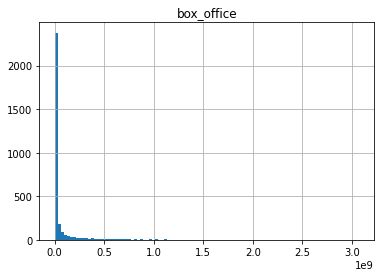

In [74]:
# посмтроим гистограмму по сборам
mkrf_general_sort_box_office.hist('box_office', bins=100)

array([[<AxesSubplot:title={'center':'box_office'}>]], dtype=object)

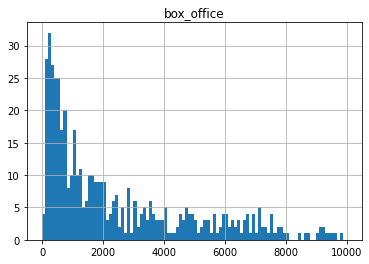

In [75]:
mkrf_general_sort_box_office.hist('box_office', bins=100, range = (0,10000))

- пики значений до 3000 рублей. Предположим, что с 30000 рублей могут быть минимальные отметки сборов. Посмотрим их процент от данных.

In [76]:
count = len(mkrf_general_sort_box_office.loc[mkrf_general_sort_box_office['box_office'] < 30000])
share = count/(len(mkrf_general_sort_box_office))*100
share

19.768190598840953

- 19% составляют данные со значениями до 30000 рублей от данных без пропусков и нулей. Это большая доля, с учетом, что значения даже до 500000 кажутся не естественными для сборов с проката.

- Оствим эти данные как есть, так как на общие суммы при исследовании они повлияют не значительно, а если их менять, например, добавлять нули - можно серьезо исказить результаты.

#### Шаг 2.6. Добавим новые столбцы


- Создадим столбец с информацией о годе проката. Выделим год из даты премьеры фильма.

In [77]:
mkrf_general_sort['show_start_year'] = mkrf_general_sort['show_start_date'].dt.year # создаем столбец с годом проката

- Создадим два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.


- Создадим два столбца: с именем и фамилией главного режиссёра и основным жанром фильма.

In [78]:
def first_value(s, sep=','): # создаем два столбца по первому значению режиссера и первому жанра из перечислений
    first = s.split(sep=sep)
    return first[0]

mkrf_general_sort['main_director'] = mkrf_general_sort['director_new'].apply(first_value)
mkrf_general_sort['main_genres'] = mkrf_general_sort['genres_new'].apply(first_value)

- Создадим столбец с общей суммой господдержки.

In [79]:
# создаем столбец с общей суммой господдержки
mkrf_general_sort['sum_gos_financ'] = (mkrf_general_sort['refundable_support'] + mkrf_general_sort['nonrefundable_support'])

- Посчитаем, какую долю от общего бюджета фильма составляет государственная поддержка.

In [80]:
# создаем столбец с долей господдержки от бюджета
mkrf_general_sort['share_financ'] = mkrf_general_sort['sum_gos_financ']/mkrf_general_sort['budget']*100

### Шаг 3. Проведем исследовательский анализ данных


- Посмотрим, сколько фильмов выходило в прокат каждый год с учетом, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитаем какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

**Проведем исследование по данным о сборах в российских кинотеатрах.**

In [81]:
# создаем сводную таблицу по количеству прокатов фильмов за каждый год
mkrf_general_group_year = mkrf_general_sort.pivot_table(index='show_start_year', values = 'title_new', aggfunc = 'count')

In [82]:
# создадим таблицу, где есть данные по фильмам с прокатом в российских кинотеатрах еще раз, где есть новые столбцы
table_box_office = mkrf_general_sort.loc[mkrf_general_sort['box_office'] > 0]
# создаем сводную таблицу по количеству прокатов фильмов за каждый год в российских кинотеатрах
table_box_office_group = table_box_office.pivot_table(index='show_start_year', values = 'title_new', aggfunc = 'count')

In [83]:
# соединяем данные двух таблиц, переименовываем столбцы и рассчитываем долю в отдельном столбце
group_year_title = mkrf_general_group_year.merge(table_box_office_group, on = 'show_start_year')
group_year_title.columns = ['total_title', 'box_of_title']
# добавим столбец с долей прокатов в российских кинотеатрах от общего количества прокатов
group_year_title['share_title_box'] = group_year_title['box_of_title']/group_year_title['total_title']*100
group_year_title

,total_title,box_of_title,share_title_box
show_start_year,,,
2010,751,97,12.916112
2011,541,106,19.593346
2012,526,122,23.193916
2013,590,178,30.169492
2014,747,270,36.144578
2015,663,459,69.230769
2016,680,512,75.294118
2017,498,357,71.686747
2018,882,475,53.854875


<AxesSubplot:xlabel='show_start_year'>

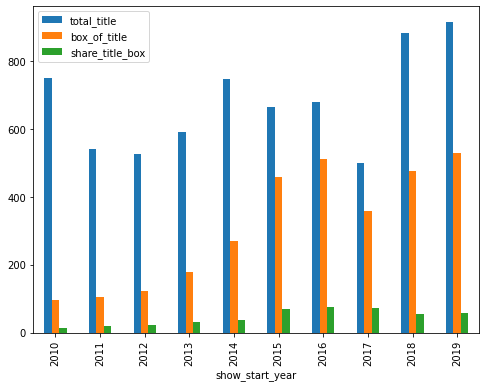

In [84]:
group_year_title.plot(kind='bar', figsize =(8,6)) # строим столбчатую диаграмму по сводной таблице с прокатом фильмов

- По произведенным расчетам видно, доля фильмов с прокатом в российских кинотеатрах увеличивалась каждый год с 2010 года до 2017 года, и стала сильно падать с 2018 года. При этом общий прокат фильмов то сильно уменьшался, то увеличивался. В 2015-2016 годах доли почти равны. Полнее всего представлен период с 2015 по 2019 года, так как цифры прокатов в российских кинотеатрах стали приблежаться к общему числу вышедших фильмов.

- Изучим, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

In [86]:
# создаем таблицу по годам и сборам от проката в российских кинотеатрах
box_office_group_sum = table_box_office.pivot_table(index='show_start_year', values = 'box_office', aggfunc = ['sum', 'max'])
box_office_group_sum.columns = ['box_office_sum', 'max'] 
box_office_group_sum = box_office_group_sum.astype('int')
box_office_group_sum

,box_office_sum,max
show_start_year,,
2010,2426054,1446400
2011,14041290,11618085
2012,6911073,2311220
2013,29796888,19957032
2014,7444948737,1016410635
2015,39497361810,1658861426
2016,47866051070,2048126108
2017,48563707218,2779686144
2018,49668403134,2271754005


<AxesSubplot:xlabel='show_start_year'>

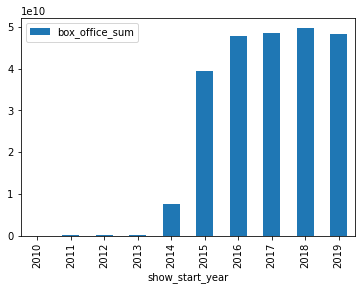

In [87]:
box_office_group_sum.plot(y = 'box_office_sum', kind='bar') # строим столбчатую диаграмму по сборам в рф кинотеатрах по годам

- В динамике по годам сумма сборов сильно изменилась в 2014 году, а именно увеличилась больше чем в 250 раз.\
И еще раз подскочила в 2015 году - увеличилась еще в 4 раза и продолжала расти до 2017 года, где была максимальная отметка по общим сборам за год. С 2017 до 2019 цифры по общим сборам примерно остаются на ровне.

In [88]:
# создаем функцию для подсчета максимальных и минимальных сборов
def couting(tabl):
    max_sum = tabl['box_office_sum'].max()
    index_max = tabl.index[tabl['box_office_sum'] == max_sum].tolist()
    print(f'В {index_max[0]} году общая сумма сборов за год была максимальной и составила {max_sum} рублей.')
    
    min_sum = tabl['box_office_sum'].min()
    index_min = tabl.index[tabl['box_office_sum'] == min_sum].tolist()
    print(f'В {index_min[0]} году общая сумма сборов за год была минимальной и составила {min_sum} рублей.')
    
    print()

    max_sum_year = tabl['max'].max()
    index_max_yaer = tabl.index[tabl['max'] == max_sum_year].tolist()
    print(f'В {index_max_yaer[0]} году была самая большая сумма сборов и составила {max_sum_year} рублей.')
    
couting(box_office_group_sum)

В 2018 году общая сумма сборов за год была максимальной и составила 49668403134 рублей.
В 2010 году общая сумма сборов за год была минимальной и составила 2426054 рублей.

В 2019 году была самая большая сумма сборов и составила 3073568691 рублей.


Год с самой маленькой суммой сборов рассчитывать не будем - из-за некорректных данных по сборам, где есть крайне маленькие не реальные показатели.

- С помощью сводной таблицы посчитайем среднюю и медианную сумму сборов для каждого года.

In [89]:
# создаем сводную таблицу с подсчетом средней и медианной суммы сборов для каждого года
box_office_mean_median = table_box_office.pivot_table(index='show_start_year', values = 'box_office', aggfunc = ['mean', 'median'])
box_office_mean_median.columns = ['box_office_mean', 'box_office_median']
box_office_mean_median['box_office_mean'] = box_office_mean_median['box_office_mean'].astype('int')
box_office_mean_median

,box_office_mean,box_office_median
show_start_year,,
2010,25010,1916.0
2011,132465,2952.5
2012,56648,6110.0
2013,167398,3680.0
2014,27573884,22575.0
2015,86050897,5175580.0
2016,93488380,4505723.0
2017,136032793,9968340.0
2018,104565059,8891102.0


- По сводной таблице со средними и медианными значениям сборов по каждому году наблюдаются большие разрывы.\
Это говорит о том, что в каждом году были фильмы с выдающимися значениями сборов. 

- Определим, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год. Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположим, с чем это может быть связано.

In [90]:
# создаем таблицу для периода с 2015 по 2019 года
table_box_office_period = table_box_office.loc[table_box_office['show_start_year'].isin([2015, 2016, 2017, 2018, 2019])]

In [91]:
# создаем сводную таблицу по возрастным ограничениям и сборам по ним и по количеству фильмов в прокате
box_office_period_age = table_box_office_period.pivot_table(index=['age_restriction'], values = 'box_office', aggfunc = ['sum', 'count'])
box_office_period_age.columns = ['box_office_sum', 'title_count']
box_office_period_age['box_office_sum'] = box_office_period_age['box_office_sum'].astype(int)
box_office_period_age

,box_office_sum,title_count
age_restriction,,
«0+» - для любой зрительской аудитории,809030399,86
«12+» - для детей старше 12 лет,60619422129,346
«16+» - для детей старше 16 лет,76034562059,798
«18+» - запрещено для детей,40759610627,790
«6+» - для детей старше 6 лет,55798606801,313


<AxesSubplot:ylabel='box_office_sum'>

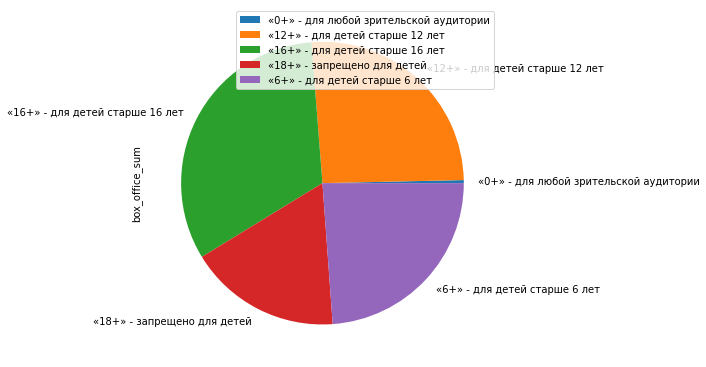

In [92]:
# строим круговую диаграмму по общей сумме сборов по каждой категории
box_office_period_age.plot(y='box_office_sum', kind='pie', figsize=(6.5, 6.5))

<AxesSubplot:xlabel='age_restriction'>

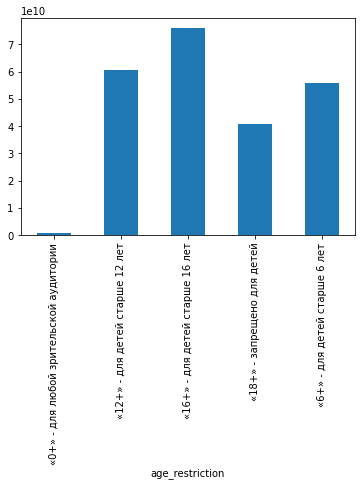

In [93]:
# построим столбчатую диаграмму по общей сумме сборов по каждой категории
box_office_period_age['box_office_sum'].plot(kind='bar') 

<AxesSubplot:xlabel='age_restriction'>

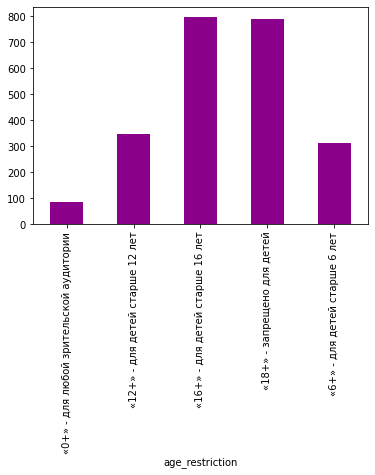

In [94]:
# построим столбчатую диаграмму по количеству прокатов по каждой категории
box_office_period_age['title_count'].plot(kind='bar', color = 'darkmagenta') 

- По столбчатой диаграмме видно, что Фильмы «16+» собрали больше всего денег в прокате. А значительно меньше собрали фильмы категории «0+», но и само количество прокатов по данной категории в несколько раз меньше. А у категории «18+» показов почти столько же сколько у «16+», но сборов в два раза меньше. Посмотрим по годам.

In [95]:
# создаем сводную таблицу по годам т возрастным ограничениям и сборам по ним
box_office_age_year = table_box_office_period.pivot_table(index=['show_start_year','age_restriction'], values = 'box_office', aggfunc = 'sum')
box_office_age_year['box_office'] = box_office_age_year['box_office'].astype(int)
box_office_age_year

box_office
show_start_year age_restriction                                    
2015            «0+» - для любой зрительской аудитории    379053100
                «12+» - для детей старше 12 лет         13616082007
                «16+» - для детей старше 16 лет         11368118967
                «18+» - запрещено для детей              5432308365
                «6+» - для детей старше 6 лет            8701799371
2016            «0+» - для любой зрительской аудитории    150183301
                «12+» - для детей старше 12 лет         12204422026
                «16+» - для детей старше 16 лет         16664378857
                «18+» - запрещено для детей              6793924875
                «6+» - для детей старше 6 лет           12053142011
2017            «0+» - для любой зрительской аудитории    229598930
                «12+» - для детей старше 12 лет          7851427661
                «16+» - для детей старше 16 лет         18745042900
                «18+» - запрещено для детей              9651495581
                «6+» - для детей старше 6 лет           12086142146
2018            «0+» - для любой зрительской аудитории     32449002
                «12+» - для детей старше 12 лет         14267291657
                «16+» - для детей старше 16 лет         16503602350
                «18+» - запрещено для детей              8760085500
                «6+» - для детей старше 6 лет           10104974625
2019            «0+» - для любой зрительской аудитории     17746066
                «12+» - для детей старше 12 лет         12680198778
                «16+» - для детей старше 16 лет         12753418985
                «18+» - запрещено для детей             10121796306
                «6+» - для детей старше 6 лет           12852548648

<AxesSubplot:xlabel='show_start_year', ylabel='box_office'>

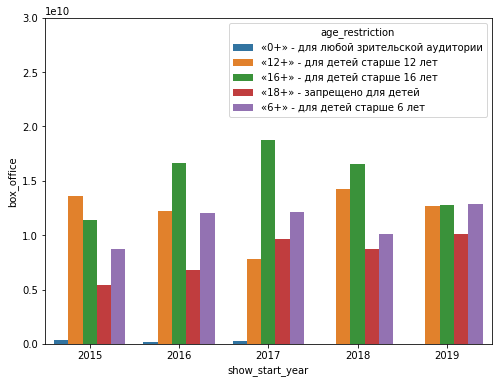

In [96]:
# построим столбчатую диаграмму по годам и сумме сборов по каждой каттегории
box_office_age_year = box_office_age_year.reset_index()
fig, ax = plt.subplots(figsize=(8, 6))
plt.ylim(-1000, 30000000000)
sns.barplot(data = box_office_age_year, x = 'show_start_year', y = 'box_office', hue = 'age_restriction', ax=ax)

- по каждой возрастной группе ограничения аудитории меняются сборы по фильмам в прокате по годам. По всем годам в периоде наблюдаются низкие показатели сборов категории фильмов «0+». С 2016года стали набирать обороты по сборам фильмы категории «16+» и падать с 2018 года. В 2019 году сборы по каждой категории почти уровнялись, кроме «0+». Изменчивость картины может быть связана с разными обстоятельствами, в том числе политическими - ситуацией в стране, социальными и улучшением качества кинемотографа.

### Шаг 4. Исследуем фильмы, которые получили государственную поддержку

Посмотрим, сколько выделяют средств на поддержку кино. Проверим, хорошо ли окупаются такие фильмы, какой у них рейтинг.

**Создадим сводню таблицу по источникам финансированиия и проведем исследование**

In [97]:
# создаем сводню таблицу по источникам финансированиия
mkrf_financing = mkrf_general_sort.pivot_table(index='financing_source', values=['budget', 'refundable_support', 'nonrefundable_support'], aggfunc = 'sum')
mkrf_financing['budget'] = mkrf_financing['budget'].astype(int)
mkrf_financing

,budget,nonrefundable_support,refundable_support
financing_source,,,
Министерство культуры,11472887983,4836661000,0
"Министерство культуры, Фонд кино",2640432474,859931354,325500000
Фонд кино,28981667109,10565095958,3613500000


<AxesSubplot:xlabel='financing_source'>

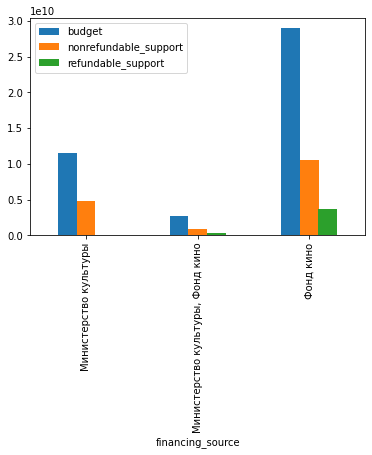

In [98]:
mkrf_financing.plot(kind='bar') # строим стобчатую диагрмму по сводной таблице mkrf_general_finans

- По столбчатой диаграмме видно, что больше всего финансировались фильмы "Фондом кино". А "Министерство культуры" не выставляло объёмов возвратных средств, то есть по фильмам, которые она финансировало не было обязательных сумм для возврата.

**Посчитаем сколько всего фильмов было финансировано по годам.**

In [99]:
# создадим таблицу только с источниками финансирования
group_financing_source = mkrf_general_sort.loc[mkrf_general_sort['financing_source'].isna() == False]
grop_title_sum = group_financing_source.pivot_table(index='show_start_year', values=['sum_gos_financ'], aggfunc = ['count', 'sum'])
grop_title_sum.columns = ['title_count', 'sum_gos_financ']
grop_title_sum

,title_count,sum_gos_financ
show_start_year,,
2013,2,134347945
2014,16,572002299
2015,86,3656241459
2016,61,4303155482
2017,41,3183971662
2018,56,3446969465
2019,70,4904000000


<AxesSubplot:xlabel='show_start_year'>

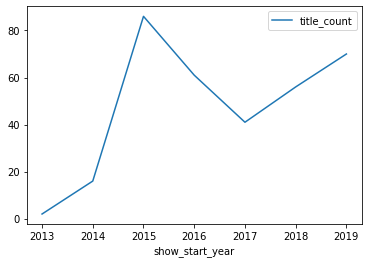

In [100]:
# строим линейную диаграмму по количеству фильмов, которые получили господдержку
grop_title_sum.plot(y='title_count')

- Меньше всего фильмов с госфинансированием вышло в прокат в 2013 году - 2 фильма. В 2014 году вышло 16 фильмов, а в 2015 году произошел большой скачок и количество фильмов с господдержкой составило 86. В 2016-2017 годах количество стало снижаться. И с 2018 наблюдался рост количества фильмов с господдержкой и 2019 году было выпущено в прокат 70 фильмов.

In [101]:
# вычислим общее количество финансиуруемых фильмов за период
grop_title_sum['title_count'].sum()

332

<AxesSubplot:xlabel='show_start_year'>

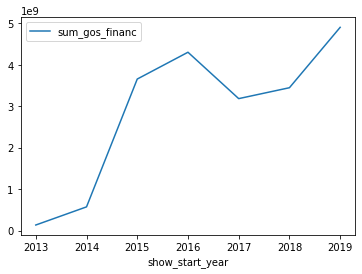

In [102]:
# строим линейную диаграмму по сумме господдержки, предоставленной за каждый год
grop_title_sum.plot(y='sum_gos_financ')

- Похожая тенденция наблюдается и по величине господдержки по годам. В 2013 году была выделана самая маленькая сумма - 134347945, но и всего на 2 фильма. В 2015-ом было вычислено максимальное количество финансируемых фильмов 86, но сумма выше в 2016 году и составляет 4303155482 и далее идет на спад до 2017 года, с 2017 до 2019 растет и достигает максимума - в 2019 году сумма финансирования составила 4904000000.

In [103]:
# посчитаем общую сумму господержки и общую сумму невозвратных средств
total_sum_gos = group_financing_source['sum_gos_financ'].sum()
total_sum_gos_nonrefun = group_financing_source['nonrefundable_support'].sum() # общая сумма невозвратных средств
print('Общая сумма финансовой поддержки за период 2013-2019 составила:', total_sum_gos)
print('Общая сумма невозвратных средст за период 2013-2019 составила:', total_sum_gos_nonrefun)

Общая сумма финансовой поддержки за период 2013-2019 составила: 20200688312
Общая сумма невозвратных средст за период 2013-2019 составила: 16261688312


- Всего на поддержку кино государство выделило около 20 млрд рублей, из них 16 млрд рублей безвозмездно. 

**Посмотрим как распределялось госфинансирование фильмов относительно возрастных категорий.**

<AxesSubplot:ylabel='age_restriction'>

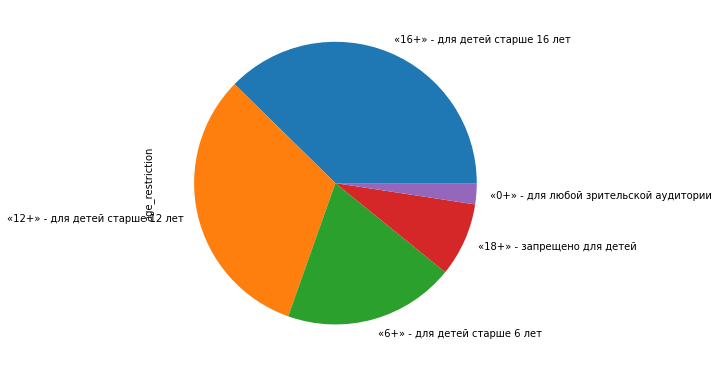

In [104]:
# строим круговую диаграмму по распределеню господдержки относительно возрастных ограничений фильмов
group_financing_source['age_restriction'].value_counts().plot(y='count', kind='pie', figsize=(6.5, 6.5))

- Больше всего средств господдержки выделилось на фильмы категории «16+».

**Посмотрим подробнее сборы и затраты на фильмы.**

In [105]:
# создаем сводную таблицу по источникам финансированиия и фильмам, сборам, рйтингу и затратам по ним
financ_group_title = table_box_office.pivot_table(index=['financing_source', 'title_new'], values=['budget', 'share_financ', 'ratings', 'box_office', 'sum_gos_financ', 'nonrefundable_support'])
financ_group_title['budget'] = financ_group_title['budget'].astype(int)
financ_group_title['box_office'] = financ_group_title['box_office'].astype(int)

Посмотрим данные таблицы по наивысшему рейтингу.

In [106]:
financ_group_title.sort_values(by='ratings', ascending = False).head() # отсортируем таблицу по убыванию рейтинга

box_office     budget  \
financing_source                 title_new                                   
Фонд кино                        БОЛЬШОЙ              228578204  320000000   
                                 А зори здесь тихие   249166768  220588394   
                                 Миллиард             408646666  240041307   
Министерство культуры            Пока еще жива           365354   79411900   
Министерство культуры, Фонд кино Мотылёк                 410058   63170000   

                                                     nonrefundable_support  \
financing_source                 title_new                                   
Фонд кино                        БОЛЬШОЙ                       200000000.0   
                                 А зори здесь тихие            100000000.0   
                                 Миллиард                      140000000.0   
Министерство культуры            Пока еще жива                  26500000.0   
Министерство культуры, Фонд кино Мотылёк                        30000000.0   

                                                     ratings  share_financ  \
financing_source                 title_new                                   
Фонд кино                        БОЛЬШОЙ                 8.5        65.625   
                                 А зори здесь тихие      8.5     67.999951   
                                 Миллиард                8.2     58.323295   
Министерство культуры            Пока еще жива           8.1     33.370314   
Министерство культуры, Фонд кино Мотылёк                 8.0      59.12123   

                                                     sum_gos_financ  
financing_source                 title_new                           
Фонд кино                        БОЛЬШОЙ                210000000.0  
                                 А зори здесь тихие     150000000.0  
                                 Миллиард               140000000.0  
Министерство культуры            Пока еще жива           26500000.0  
Министерство культуры, Фонд кино Мотылёк                 37346881.0

- фильм "Большой" с наивысшим рейтингом 8.5 плохо окупился: гос поддержка 210 млн, при том, 200 млн невозвратные, а кассаовый сбор 228,5 млн руб. На втором месте по рейтингу фильм "А зори здесь тихие" окупился лучше. \
По фильмам с высоким рейтингам господдержка не превышала 200 млн.

Посчитаем медианный рейтинг по фильмам, которые финансировались государством.

In [107]:
ratings_mean_financ = financ_group_title['ratings'].median()
ratings_mean_financ

6.1

- 6.1 медианный рейтинг фильмов, которые финансировались государством. Не высокий.

Посмотри фильмы по максимальным сборам и затратам на них.

In [108]:
# добавим столбец с долей общего бюджета от сборов
financ_group_title['share_budget'] = financ_group_title['budget']/financ_group_title['box_office']*100
financ_group_title['share_budget'] = financ_group_title['share_budget'].astype(int)
# отсортируем таблицу по убыванию сборов
financ_group_title.sort_values(by='box_office', ascending = False).head()

box_office     budget  \
financing_source title_new                                   
Фонд кино        Холоп               3073568691  160000000   
                 Движение вверх      2779686144  590192191   
                 Т-34                2271754005  563784717   
                 Последний богатырь  1655037688  352477575   
                 Лёд                 1445731798  148585222   

                                     nonrefundable_support  ratings  \
financing_source title_new                                            
Фонд кино        Холоп                          35000000.0      6.8   
                 Движение вверх                400000000.0      7.5   
                 Т-34                          120000000.0      6.5   
                 Последний богатырь             50000000.0      6.8   
                 Лёд                            60000000.0      0.0   

                                     share_financ  sum_gos_financ  \
financing_source title_new                                          
Фонд кино        Холоп                       37.5      60000000.0   
                 Движение вверх         67.774533     400000000.0   
                 Т-34                    31.92708     180000000.0   
                 Последний богатырь     28.370599     100000000.0   
                 Лёд                    57.206227      85000000.0   

                                     share_budget  
financing_source title_new                         
Фонд кино        Холоп                          5  
                 Движение вверх                21  
                 Т-34                          24  
                 Последний богатырь            21  
                 Лёд                           10

- Фильмы "Холоп", "Движение вверх" и "Т-34" окупились лучше всего, с рейтингом выше среднего. \
При этом у фильма "Холоп" доля госфинансирования составила около 1/3 от бюджета, а бюджет составил 5% от сборов в российских кинотеатрах.

In [109]:
# посчитаем общую сумму сборов за фильмы с господдержкой
financ_group_title['box_office'].sum()

42113509577

Посмотрим какие фильмы финансировались дороже всех.

In [110]:
# отсортируем таблицу по убыванию общей суммы господдержки
financ_group_title.sort_values(by='sum_gos_financ', ascending = False).head()

box_office     budget  \
financing_source title_new                                    
Фонд кино        Союз спасения         717703186  980000000   
                 Дуэлянт               364285140  684200536   
                 Экипаж               1402255390  635283867   
                 Движение вверх       2779686144  590192191   
                 Легенда о Коловрате   590405065  500012729   

                                      nonrefundable_support  ratings  \
financing_source title_new                                             
Фонд кино        Союз спасения                  400000000.0      6.0   
                 Дуэлянт                        300000000.0      6.6   
                 Экипаж                         392104482.0      7.6   
                 Движение вверх                 400000000.0      7.5   
                 Легенда о Коловрате            250000000.0      6.4   

                                      share_financ  sum_gos_financ  \
financing_source title_new                                           
Фонд кино        Союз спасения           51.020408     500000000.0   
                 Дуэлянт                 65.770191     450000000.0   
                 Экипаж                  69.591643     442104482.0   
                 Движение вверх          67.774533     400000000.0   
                 Легенда о Коловрате     69.998218     350000000.0   

                                      share_budget  
financing_source title_new                          
Фонд кино        Союз спасения                 136  
                 Дуэлянт                       187  
                 Экипаж                         45  
                 Движение вверх                 21  
                 Легенда о Коловрате            84

- фильмы, на которые выделилось больше всего средств, "Союз спасения" и "Дуэлянт", не окупились совсем. Сумма безвозратной господдержки составила по 400 млн и 300 млн. \
Бюджет от сборов составил 136% и 187% - то есть на фильмы потратили больше, чем собрали с проката.

In [111]:
min_f = financ_group_title['sum_gos_financ'].min()
index = financ_group_title.index[financ_group_title['sum_gos_financ'] == min_f].tolist()
print(f'Минимальная ссума господдержки была выделена на фильм "{index[0][1]}" и составила {min_f}')

Минимальная ссума господдержки была выделена на фильм "Я умею вязать" и составила 4700000.0


- Фильмы с господдержкой есть как и окупившиеся с высокими и средними рейтингами, так и не окупившиеся и средними рейтингами.\
Можно сделать вывод, что интерес к картинам не зависит от наличия господдержки.

**Посмотрим фильмы каких режиссеров поддерживаются государством больше остальных и какие у них рейтинги**

In [112]:
table_box_director = table_box_office.pivot_table(index=['financing_source', 'main_director'], values=['budget', 'share_financ', 'ratings', 'box_office', 'sum_gos_financ', 'nonrefundable_support'])
table_box_director['box_office'] = table_box_director['box_office'].astype(int)
table_box_director['budget'] = table_box_director['budget'].astype(int)
table_box_director.sort_values(by='sum_gos_financ', ascending = False).head()

box_office     budget  nonrefundable_support  \
financing_source main_director                                                 
Фонд кино        а.кравчук       717703186  980000000            400000000.0   
                 а.мизгирев      364285140  684200536            300000000.0   
                 н.лебедев      1402255390  635283867            392104482.0   
                 а.мегердичев   2779686144  590192191            400000000.0   
                 и.шурховецкий   590405065  500012729            250000000.0   

                                ratings  share_financ  sum_gos_financ  
financing_source main_director                                         
Фонд кино        а.кравчук          6.0     51.020408     500000000.0  
                 а.мизгирев         6.6     65.770191     450000000.0  
                 н.лебедев          7.6     69.591643     442104482.0  
                 а.мегердичев       7.5     67.774533     400000000.0  
                 и.шурховецкий      6.4     69.998218     350000000.0

- Больше всего средств выделялось государство на фильмы А.Кравчука и А.Мизгирева.

Посмотрим у каких режиссеров самые большие сборы.

In [113]:
table_box_director.sort_values(by='box_office', ascending = False).head()

box_office     budget  nonrefundable_support  \
financing_source main_director                                                 
Фонд кино        а.мегердичев   2779686144  590192191            400000000.0   
                 а.сидоров      2271754005  563784717            120000000.0   
                 к.шипенко      1913124234  326866978            130000000.0   
                 о.трофим       1445731798  148585222             60000000.0   
                 н.лебедев      1402255390  635283867            392104482.0   

                                ratings  share_financ  sum_gos_financ  
financing_source main_director                                         
Фонд кино        а.мегердичев       7.5     67.774533     400000000.0  
                 а.сидоров          6.5      31.92708     180000000.0  
                 к.шипенко          7.1      41.53555     142500000.0  
                 о.трофим           0.0     57.206227      85000000.0  
                 н.лебедев          7.6     69.591643     442104482.0

- А самые большие сборы у фильмов А.Мегердичева и А.Сидорова

**Посмотрим фильмы каких жанров поддерживаются государством больше остальных**

In [114]:
table_box_genres = table_box_office.pivot_table(index=['financing_source', 'main_genres'], values=['budget', 'share_financ', 'ratings', 'box_office', 'sum_gos_financ', 'nonrefundable_support'])
table_box_genres['box_office'] = table_box_genres['box_office'].astype(int)
table_box_genres['budget'] = table_box_genres['budget'].astype(int)
table_box_genres['sum_gos_financ'] = table_box_genres['budget'].astype(int)
table_box_genres.sort_values(by='sum_gos_financ', ascending = False).head()

box_office      budget  nonrefundable_support  \
financing_source main_genres                                                  
Фонд кино        приключения   438964660  1416758140            132500000.0   
                 история       482090376   659946432            260000000.0   
                 детектив       64227602   476852333            165000000.0   
                 фэнтези       163224950   349632693       109166666.666667   
                 драма         361503738   251742671       111737654.409091   

                               ratings  share_financ  sum_gos_financ  
financing_source main_genres                                          
Фонд кино        приключения  6.650000     29.511086      1416758140  
                 история      6.066667     49.009216       659946432  
                 детектив     6.300000     39.061154       476852333  
                 фэнтези      5.783333     50.886066       349632693  
                 драма        6.663636     56.583689       251742671

- Больше всего выделялось госсредств на фильмы жанра "приключения".

Посмотрим у каких жанров фильмов самые большие сборы.

In [115]:
table_box_genres.sort_values(by='box_office', ascending = False).head()

box_office      budget  nonrefundable_support  \
financing_source main_genres                                                  
Фонд кино        спорт         989256129   236822988       151666666.666667   
                 история       482090376   659946432            260000000.0   
                 приключения   438964660  1416758140            132500000.0   
                 nan           364541530    88382068            60992366.25   
                 драма         361503738   251742671       111737654.409091   

                               ratings  share_financ  sum_gos_financ  
financing_source main_genres                                          
Фонд кино        спорт        6.933333     54.027573       236822988  
                 история      6.066667     49.009216       659946432  
                 приключения  6.650000     29.511086      1416758140  
                 nan          0.000000     84.985592        88382068  
                 драма        6.663636     56.583689       251742671

- Самые большие сборы у фильмов жанра "спорт".

### Шаг 5. Общий вывод

Были в распоряжении данные, опубликованные на портале открытых данных Министерства культуры.\
Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.\
Выполнены следующие шаги:
1. Объеденены две таблицы с данными.
2. Рассмотрены типы данных в каждом столбце и заменены, где необходимо.
3. Изучены пропущенные значения в столбцах и заполнены пропуски, где это возможно.
4. Обнаружены и устранены дубликаты.
5. Изучены и скорректированы категориальные значения.
6. Изучены количественные значения и исправлены некорректные данные.
7. Добавлены новые столбцы для удобства исследования.
8. Проведено исследование в поисках интересных особенностей и зависимостей, которые существуют в прокате кино.

В данных представлены фильмы разных стран, вышедшие в прокат в период с 2010 по 2019 года с бюджетом от 3692307 до 2305074303.
Со сборами в российских кинотеатрах с максимальной отметкой 3073568691. Определить минимальные сборы не удалось - в данных много неккоректных значений, с не реалистично маленькими суммами по сборам.
Выявлены фильмы с минимальной суммой господдержки 4700000 - "Я умею вязать", и максимальной для фильма "Союз спасения" 500000000.\
Больше всего финансировались фильмы "Фондом кино". А "Министерство культуры" не выставляло объёмов возвратных средств.

За период 2010-2019 госфинансирванием было выделено на 332 фильма 20 млрд рублей, из них 16 млрд рублей составил безвозратный объем средств.
Меньше всего фильмов с госфинансированием вышло в прокат в 2013 году - 2 фильма, а больше всего в 2015 году - 86 фильмов.\
Самая маленькая сумма была выделена в 2013 году и составила 134347945, а максимальна в 2019 году и составила 4904000000.

Фильмы с господдержкой есть как и окупившиеся с высокими и средними рейтингами, так и не окупившиеся и средними рейтингами.
Медианный рейтинг фильмов с господержкой составляет 6.1. У фильмов с высоким рейтингом господдержка не превышала 200 млн.

Общие сборы у фильмов с господдержкой составили около 42 млрд рублей.\
Фильмы "Холоп", "Движение вверх" и "Т-34" окупились лучше всего, с рейтингом выше среднего. У фильма "Холоп" самые высокие сборы из фильмов с господдержкой и составили - 3073568691 рублей.
Фильмы, на которые выделилось больше всего средств - около 400-500 млн, "Союз спасения" и "Дуэлянт", не окупились совсем. 

Больше всего средств господдержки выделилось на фильмы категории «16+», на втором месте категория «12+». 
Самые высокие сборы у фильмов с господдержкой в жанре "спорт", а денег больше выделяется на жанры "приключения", "история" и "детектив".\
Скорее всего они затратнее и на них предполагается больше спрос.

Фильмы с господдержкой составили всего 4% из всех представленных картин за период 2010 - 2019 года. Не отличаются конкретными жанрами. Судя по рейтингам - фильмы с высокими рейтингам господдержка не превышала 200 млн. А где суммы доходят до 400-500 млн - рейтинги средние. Из чего можно сделать вывод, что для зрителя фильмы с господдержкой менее интересны.
